In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
y = df['Exited']

In [35]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
X = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [9]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
Gender = X['Gender']

In [14]:
Gender

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [17]:
Gender_dv = pd.get_dummies(Gender, drop_first=True)

In [18]:
X['Gender'] = Gender_dv

<ipython-input-18-be6c81468a1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = Gender_dv


In [19]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


In [22]:
X_final = pd.get_dummies(X, ['Geography'], drop_first=True)

In [23]:
X_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [24]:
from keras.models import Sequential

In [25]:
model = Sequential()

In [26]:
from keras.layers import Dense

In [28]:
X_final.shape

(10000, 11)

In [29]:
model.add(
    Dense(
        units = 11,
        input_shape = (11,),
        activation = 'relu',
        
    
    )
)


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.add(
    Dense(
        units = 10,
        activation = 'relu'   
    )
)


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                120       
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.add(
    Dense(
        units = 5,
        activation = 'relu'   
    )
)


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


In [36]:
# final layer since it is binary classification, 1 neuron is enough so 1 unit
model.add(
    Dense(
        units = 1,   
        activation = 'sigmoid'   
    )
)


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
Scaler = StandardScaler()

In [42]:
X_scaled = Scaler.fit_transform(X_final)

In [43]:
model.fit(X_scaled, y, epochs=20)

Epoch 1/20
313/313 [==============================] - 14s 770us/step - loss: 0.6686 - accuracy: 0.5807
Epoch 2/20
313/313 [==============================] - 0s 780us/step - loss: 0.4464 - accuracy: 0.8019
Epoch 3/20
313/313 [==============================] - 0s 733us/step - loss: 0.4281 - accuracy: 0.8036
Epoch 4/20
313/313 [==============================] - 0s 754us/step - loss: 0.4059 - accuracy: 0.8148
Epoch 5/20
313/313 [==============================] - 0s 745us/step - loss: 0.3796 - accuracy: 0.8316
Epoch 6/20
313/313 [==============================] - 0s 790us/step - loss: 0.3577 - accuracy: 0.8520
Epoch 7/20
313/313 [==============================] - 0s 984us/step - loss: 0.3607 - accuracy: 0.8475
Epoch 8/20
313/313 [==============================] - 0s 791us/step - loss: 0.3473 - accuracy: 0.8563
Epoch 9/20
313/313 [==============================] - 0s 776us/step - loss: 0.3559 - accuracy: 0.8525
Epoch 10/20
313/313 [==============================] - 0s 778us/step - loss: 0.34

In [47]:
loss = model.history.history['loss']

In [48]:
type(loss)

list

In [50]:
my_loss = pd.DataFrame(loss)

In [51]:
type(my_loss)

pandas.core.frame.DataFrame

<AxesSubplot:>

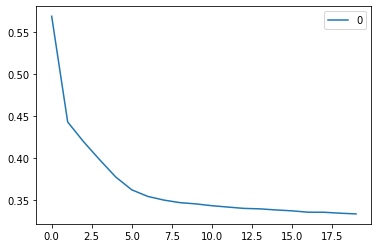

In [52]:
my_loss.plot()

In [53]:
accuracy = model.history.history['accuracy']

In [54]:
type(accuracy)

list

In [55]:
my_acc = pd.DataFrame(accuracy)

In [57]:
type(my_acc)

pandas.core.frame.DataFrame

<AxesSubplot:>

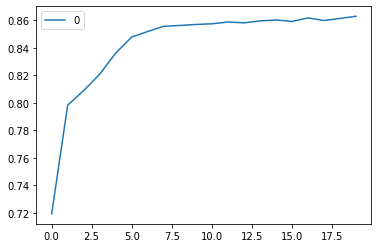

In [58]:
my_acc.plot()